In [1]:
import pandas as pd

In [2]:
import numpy as np 

In [3]:
import matplotlib as plt

In [ ]:
# What Borough  are the majority of high performing schools based in and how do their  test scores  indiate the overall  perfomance of their students 

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")

In [40]:
# After importing the necessary libraries as shown above i used the below comand to ge a preview of my dataframe
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
1,Manhattan,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,Manhattan,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1,11.1,8,88.9,2,22.2,na,na
5,Manhattan,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3,33.3,6,66.7,0,0,na,na
6,Manhattan,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2,13.3,13,86.7,5,33.3,na,na
7,Manhattan,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5,55.6,4,44.4,1,11.1,na,na


In [6]:
#i wanted to check if there were any empty cells or missing data 

nan_df = df.isna()
print(nan_df)

        School DBN  School Name  School Level  Regents Exam   Year  \
0            False        False         False         False  False   
1            False        False         False         False  False   
2            False        False         False         False  False   
3            False        False         False         False  False   
4            False        False         False         False  False   
...            ...          ...           ...           ...    ...   
212326       False        False         False         False  False   
212327       False        False         False         False  False   
212328       False        False         False         False  False   
212329       False        False         False         False  False   
212330       False        False         False         False  False   

        Total Tested  Mean Score  Number Scoring Below 65  \
0              False       False                    False   
1              False       False     

In [33]:
print(df.columns.tolist())

# this was used to see how how many columns i have to work with to compare the test scores to 

['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year', 'Total Tested', 'Mean Score', 'Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 or Above', 'Percent Scoring 65 or Above', 'Number Scoring 80 or Above', 'Percent Scoring 80 or Above', 'Number Scoring CR', 'Percent Scoring CR']


In [8]:
df.shape

(212331, 15)

In [38]:
df['School DBN'] = df['School DBN'].astype(str)

#for my first cleaning method i wanted to swith the dbn value to the actual burough that the school was based in.i thought setting the DBN values to a string would make them easier to manipulate rathwer than the objects they are currently 


In [39]:
df.groupby(['School DBN']).count()

#this was used to sort and group the different borough  codes together  so that i can see where the majority of the high performing schools are placed within the city

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
Bronx,34711,34711,34711,34711,34711,34711,34711,34711,34711,34711,34711,34711,34711,34711
Brooklyn,38694,38694,38694,38694,38694,38694,38694,38694,38694,38694,38694,38694,38694,38694
Manhattan,31204,31204,31196,31204,31204,31204,31204,31204,31204,31204,31204,31204,31204,31204
Queens,27848,27848,27848,27848,27848,27848,27848,27848,27848,27848,27848,27848,27848,27848
Staten Island,4652,4652,4652,4652,4652,4652,4652,4652,4652,4652,4652,4652,4652,4652


In [11]:
s_count = (df == 's').sum()
s_count

# in order to see how many 's' values are in the dataframe and where they are 

School DBN                         0
School Name                        0
School Level                       0
Regents Exam                       0
Year                               0
Total Tested                       0
Mean Score                     75222
Number Scoring Below 65        75222
Percent Scoring Below 65       75222
Number Scoring 65 or Above     75222
Percent Scoring 65 or Above    75222
Number Scoring 80 or Above     75222
Percent Scoring 80 or Above    75222
Number Scoring CR                  0
Percent Scoring CR                 0
dtype: int64

In [12]:
df.info() #to show which  data type is ascociated with each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [13]:
df['School DBN'] = df['School DBN'].apply(lambda x: 'Manhattan' if pd.notnull(x) and 'M' in x else x)

In [14]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,Manhattan,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,Manhattan,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,Manhattan,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,Manhattan,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,Manhattan,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [15]:
###Bklyn=K, Bronx=X, Queens=Q, Manhattan=M, Staten Is.=R

In [16]:
df['School DBN'] = df['School DBN'].apply(lambda x: 'Brooklyn' if pd.notnull(x) and 'K' in x else x)
df['School DBN'] = df['School DBN'].apply(lambda x: 'Bronx' if pd.notnull(x) and 'X' in x else x)
df['School DBN'] = df['School DBN'].apply(lambda x: 'Queens' if pd.notnull(x) and 'Q' in x else x)
df['School DBN'] = df['School DBN'].apply(lambda x: 'Staten Island' if pd.notnull(x) and 'R' in x else x)

In [17]:
df.groupby(df["School DBN"]).count()

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
Bronx,54051,54051,54051,54051,54051,54051,54051,54051,54051,54051,54051,54051,54051,54051
Brooklyn,63645,63645,63645,63645,63645,63645,63645,63645,63645,63645,63645,63645,63645,63645
Manhattan,48502,48502,48492,48502,48502,48502,48502,48502,48502,48502,48502,48502,48502,48502
Queens,39633,39633,39633,39633,39633,39633,39633,39633,39633,39633,39633,39633,39633,39633
Staten Island,6500,6500,6500,6500,6500,6500,6500,6500,6500,6500,6500,6500,6500,6500


In [18]:
df2= df[df['Total Tested']<=5]

<Axes: xlabel='School DBN'>

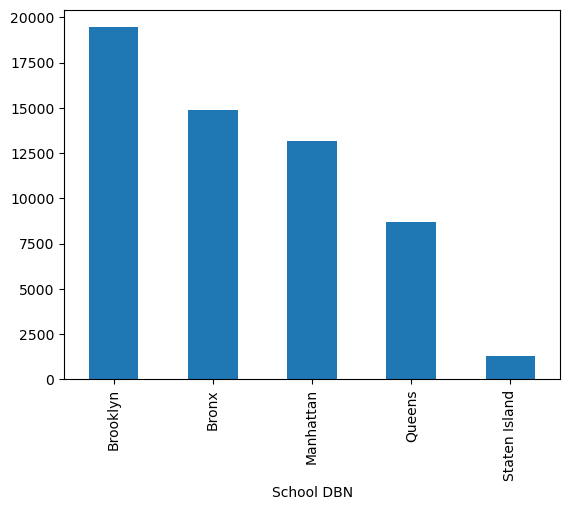

In [19]:
df2.groupby(df2["School DBN"])['Number Scoring 80 or Above'].count().sort_values(ascending=False).plot(kind='bar')

  Analysis: As shown by my data visualization the mojaority of the high performing schools based on who show many of the studens scored 80 percent or above on their Regents are in Brooklyn with nearly 20,000, the next most most schools were in the Bronx. The brough with the least amount of high perdforming schools were in Staten Island but that could easily be due to its smaller size  and as a result fewer established high schools in comprison the the more mainland new york boroughs


In [20]:
mask_80_or_above = df['Number Scoring 80 or Above'] == True


In [21]:
df['Mean Score'] = pd.to_numeric(df['Mean Score'], errors='coerce')


In [22]:
mask_mean_score_above_80 = df['Mean Score'] > 80


In [23]:
combined_mask = mask_80_or_above | mask_mean_score_above_80

In [24]:
filtered_df = df[combined_mask]


In [25]:
filtered_df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
10,Manhattan,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8,0,0,51,100,44,86.3,50,98
11,Manhattan,P.S. 184m Shuang Wen,K-8,Living Environment,2017,55,83.9,1,1.8,54,98.2,43,78.2,na,na
55,Manhattan,School for Global Leaders,Junior High-Intermediate-Middle,Common Core Algebra,2015,6,80.7,0,0,6,100,3,50,6,100
98,Manhattan,East Side Community School,Secondary School,Common Core English,2016,182,82.2,11,6,171,94,132,72.5,151,83
159,Manhattan,Lower East Side Preparatory High School,High school,Algebra2/Trigonometry,2015,60,85.4,4,6.7,56,93.3,45,75,45,75


Further Analysis: after visually illustrating the distriubituion of high perfoming schools per borough I wanted to see seewhat the specific schools  test score distriubtion was for each testing bench. The Dataframe above shows that in schools that students that scored 80 or above on their tests if we looked at the perce value for that same metric  we can see how much of the schools student who took those tests truly exceled. for example for ps 184 we can see that 44 students who took the the common core algebra test passed with a score of 80 or higher and by looking at the percent score of that same value we can se that the 44 students consitudec 80 percent of the test taking population  with the rst at least passing the test with a 65